In [254]:
# import libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [255]:
df = pd.read_excel('../data/Daily.xlsx')
df.head(2)

,Date,USD
0,1968-03-22,40.00
1,1968-03-25,40.25


In [256]:
# IDEA: data filter scince 2020

df = df.copy()
filtered_df = df[df['Date'] > '2020-01-01']
filtered_df.head(2)

,Date,USD
13005,2020-01-02,1528.8500
13006,2020-01-03,1551.4027


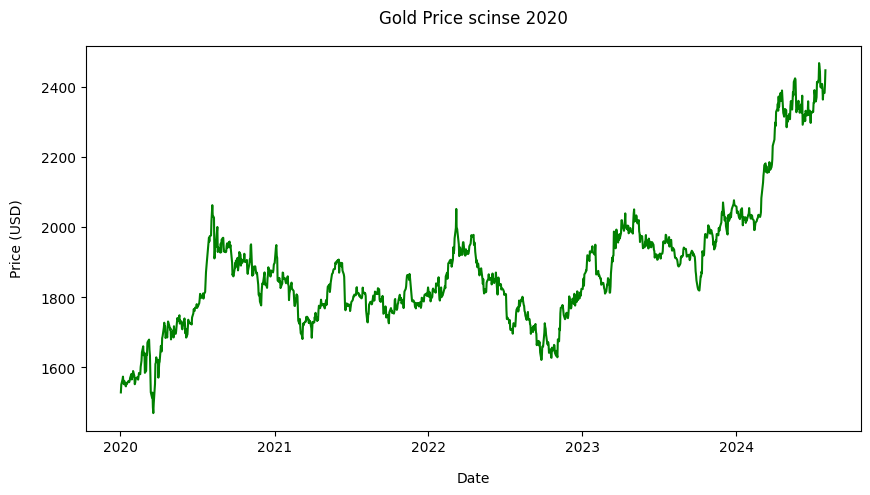

In [257]:
# NOTE: plot filtered data

plt.figure(figsize=(10,5))
plt.plot(filtered_df['Date'], filtered_df['USD'], color='green')
plt.title('Gold Price scinse 2020', pad=16)
plt.xlabel('Date', labelpad=12)
plt.ylabel('Price (USD)', labelpad=12)
plt.show()

In [258]:
print(filtered_df.isnull().sum())
print(filtered_df.dtypes)

Date    0
USD     0
dtype: int64
Date    datetime64[ns]
USD            float64
dtype: object


In [259]:
# NOTE: convert date to ordinal 

filtered_df['od_date'] = pd.to_datetime(filtered_df['Date']).astype('int64')
filtered_df.head(2)

/tmp/ipykernel_10127/3104185280.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['od_date'] = pd.to_datetime(filtered_df['Date']).astype('int64')


,Date,USD,od_date
13005,2020-01-02,1528.8500,1577923200000000000
13006,2020-01-03,1551.4027,1578009600000000000


In [260]:
print(filtered_df.index)

Index([13005, 13006, 13007, 13008, 13009, 13010, 13011, 13012, 13013, 13014,
       ...
       14185, 14186, 14187, 14188, 14189, 14190, 14191, 14192, 14193, 14194],
      dtype='int64', length=1190)


In [261]:
# train test split data

x_val = filtered_df['od_date'].values.reshape(-1,1)
y_val = filtered_df['USD'].values

x_train, x_test, y_train, y_test = train_test_split(x_val, y_val, test_size=0.3, random_state=42)
print('xtr, x_te, y_tr, y_te shape:', x_train.shape, x_train.shape, y_train.shape, y_test.shape)

xtr, x_te, y_tr, y_te shape: (833, 1) (833, 1) (833,) (357,)


In [262]:
# NOTE: Train Model -> Liner Regression

liner_m = LinearRegression()
liner_m.fit(x_train, y_train)

LinearRegression()

In [263]:
y_predict = liner_m.predict(x_test)

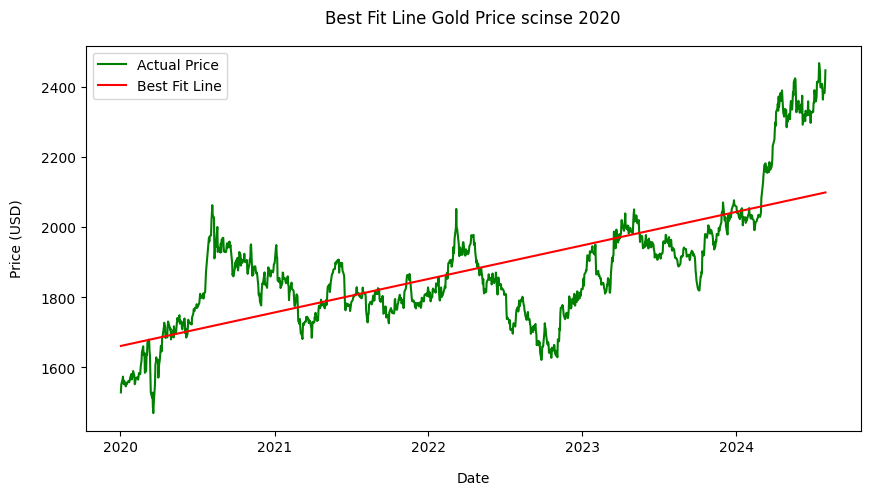

In [264]:
# NOTE: best fit line plot

degree = 1
coefficients = np.polyfit(filtered_df['od_date'], filtered_df['USD'], degree)
polynomial = np.poly1d(coefficients)
best_fit = polynomial(filtered_df['od_date'])

plt.figure(figsize=(10,5))
plt.plot(filtered_df['Date'], filtered_df['USD'], color='green', label='Actual Price')
plt.plot(filtered_df['Date'], best_fit, color='red', label='Best Fit Line')
plt.title('Best Fit Line Gold Price scinse 2020', pad=16)
plt.xlabel('Date', labelpad=12)
plt.ylabel('Price (USD)', labelpad=12)
plt.legend()
plt.show()

In [265]:
x_test = x_test.flatten()

df_data = pd.to_datetime(filtered_df['Date']).astype('int64')

temp_data1 = filtered_df[df_data.isin(x_test)]
pred_data = pd.DataFrame({'Date':temp_data1['Date'], 'Actual_Price':temp_data1['USD'], 'Predicted_Price': y_predict})
pred_data

,Date,Actual_Price,Predicted_Price
13007,2020-01-06,1565.8586,1806.189966
13008,2020-01-07,1573.8876,1753.647440
13011,2020-01-10,1562.0330,1758.135998
13015,2020-01-16,1552.5400,1719.323177
13017,2020-01-20,1561.2800,2026.393317
...,...,...,...
14163,2024-06-18,2328.3301,1706.385570
14181,2024-07-12,2411.2744,1866.917509
14186,2024-07-19,2400.7900,2040.915121
14187,2024-07-22,2397.6475,1909.426789


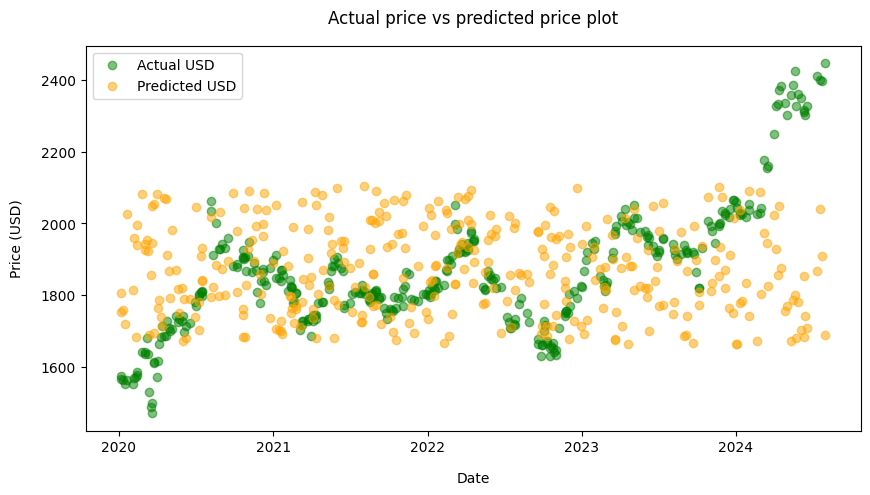

In [266]:
# NOTE: plot in predictions 

plt.figure(figsize=(10,5))
plt.scatter(pred_data['Date'], pred_data['Actual_Price'], color='green', label='Actual USD', alpha=0.5)
plt.scatter(pred_data['Date'], pred_data['Predicted_Price'], color='orange', label='Predicted USD', alpha=0.5)

plt.title('Actual price vs predicted price plot', pad=16)
plt.xlabel('Date', labelpad=12)
plt.ylabel('Price (USD)', labelpad=12)
plt.legend()

In [267]:
# NOTE: mean absolut error in

mae_score = mean_absolute_error(y_test, y_predict)
print('Mean Absolute Error: ', mae_score)

Mean Absolute Error:  95.88505492278163


In [268]:
# INFO: get one month data to get predict

one_mdf = pd.read_excel('../data/month_dates.xlsx')
one_mdf.head(2)

,Date,USD
0,2024-08-01,2445.4197
1,2024-08-02,2443.2947


In [269]:
# NOTE: convert date to ordinal

one_mdf['od_date'] = pd.to_datetime(one_mdf['Date']).astype('int64')
one_mdf.head(2)

,Date,USD,od_date
0,2024-08-01,2445.4197,1722470400000000000
1,2024-08-02,2443.2947,1722556800000000000


In [270]:
# NOTE: reshape the values
x_mnth = one_mdf['od_date'].values.reshape(-1,1)
y_mnth = one_mdf['USD'].values

# NOTE: predict data
y_mnth_predict = liner_m.predict(x_mnth)

month_df = pd.DataFrame({'Date': one_mdf['Date'], 'Actual_Price': one_mdf['USD'], 'Predicted_Price': y_mnth_predict})
month_df

,Date,Actual_Price,Predicted_Price
0,2024-08-01,2445.4197,2103.754926
1,2024-08-02,2443.2947,2104.018959
2,2024-08-05,2407.6475,2104.811057
3,2024-08-06,2389.3700,2105.075090
4,2024-08-07,2381.5349,2105.339123
5,2024-08-08,2426.7478,2105.603156
6,2024-08-09,2430.9258,2105.867189
7,2024-08-12,2472.2507,2106.659287
8,2024-08-13,2465.0293,2106.923320
9,2024-08-14,2447.6421,2107.187352


In [271]:
# NOTE: mean absolute error month period

mae_mnth_scr = mean_absolute_error(y_mnth, y_mnth_predict)
print('Mean Absolute Error Month P: ', mae_mnth_scr)

Mean Absolute Error Month P:  402.56934767235964


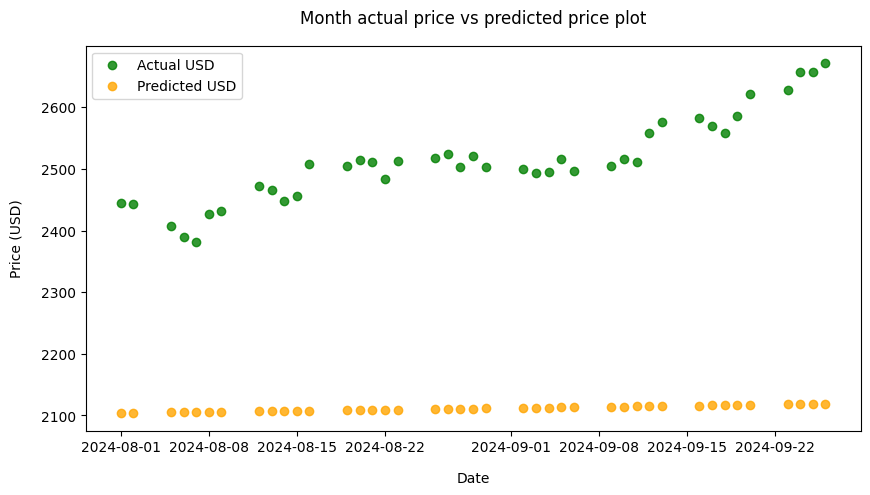

In [272]:
# NOTE: plot in month predictions 

plt.figure(figsize=(10,5))
plt.scatter(month_df['Date'], month_df['Actual_Price'], color='green', label='Actual USD', alpha=0.8)
plt.scatter(month_df['Date'], month_df['Predicted_Price'], color='orange', label='Predicted USD', alpha=0.8)

plt.title('Month actual price vs predicted price plot', pad=16)
plt.xlabel('Date', labelpad=12)
plt.ylabel('Price (USD)', labelpad=12)
plt.legend()

In [3]:
print('Hello noteBook! with jupyter kernal :)')

Hello noteBook! with jupyter kernal :)
